In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
# datasets = ['6_cardio', '18_Ionosphere', '4_breastw', '42_WBC', 'ADBench_synthetic_5_campaign', 'ADBench_synthetic_19_landsat']
datasets = ['ADBench_synthetic_5_campaign', 'ADBench_synthetic_19_landsat']

In [21]:
# Fidelity
for dataset in datasets:
    try:
        fidelity_df = pd.read_csv(f'fidelity_{dataset}.csv')
        if 'k' not in fidelity_df.columns:
            k_col = np.array(list(range(3, 100), 2)[:len(fidelity_df)])
            fidelity_df['k'] = k_col
    except FileNotFoundError:
        print(f"File fidelity_{dataset}.csv not found.")
        continue
    plt.plot(fidelity_df['k'], fidelity_df['shap'], label='SHAP', marker='s', linestyle='-', color='lightcoral', markerfacecolor='none')
    plt.plot(fidelity_df['k'], fidelity_df['mean'], label='Mean diffusion', marker='o', linestyle='-', color='lightblue', markerfacecolor='none')
    plt.plot(fidelity_df['k'], fidelity_df['max'], label='Max diffusion', marker='^', linestyle='-', color='lightgreen', markerfacecolor='none')
    plt.xlabel('k')
    plt.ylabel('Fidelity')
    plt.grid()
    plt.legend()
    print(dataset)
    plt.savefig(f'fidelity_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()

File fidelity_ADBench_synthetic_5_campaign.csv not found.
File fidelity_ADBench_synthetic_19_landsat.csv not found.


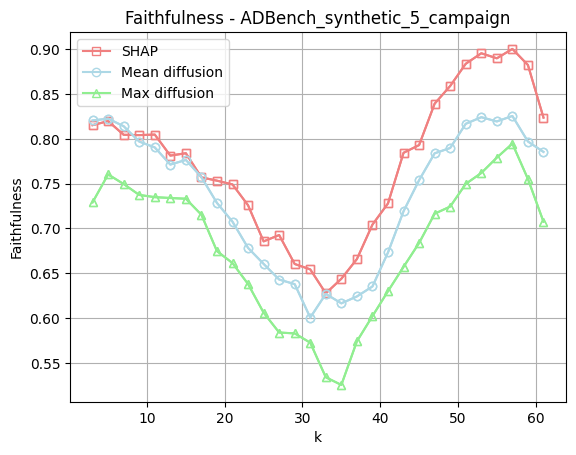

Dataset: ADBench_synthetic_5_campaign
     k      shap      mean       max   k
0    3  0.815328  0.820617  0.729180   3
1    5  0.819866  0.822591  0.760356   5
2    7  0.804559  0.814152  0.749602   7
3    9  0.804214  0.797031  0.737458   9
4   11  0.804812  0.790470  0.734957  11
5   13  0.781357  0.771336  0.734016  13
6   15  0.784011  0.776513  0.733185  15
7   17  0.757055  0.757273  0.715320  17
8   19  0.753352  0.728494  0.674694  19
9   21  0.749147  0.707540  0.661378  21
10  23  0.725889  0.678324  0.637954  23
11  25  0.685575  0.660446  0.606040  25
12  27  0.692657  0.642991  0.583832  27
13  29  0.660341  0.637837  0.582850  29
14  31  0.654337  0.600527  0.572464  31
15  33  0.627595  0.626968  0.533893  33
16  35  0.643863  0.616419  0.525340  35
17  37  0.665821  0.624108  0.574002  37
18  39  0.704308  0.635255  0.602159  39
19  41  0.727978  0.673229  0.629990  41
20  43  0.784476  0.719218  0.657105  43
21  45  0.793080  0.753893  0.683785  45
22  47  0.839319  0

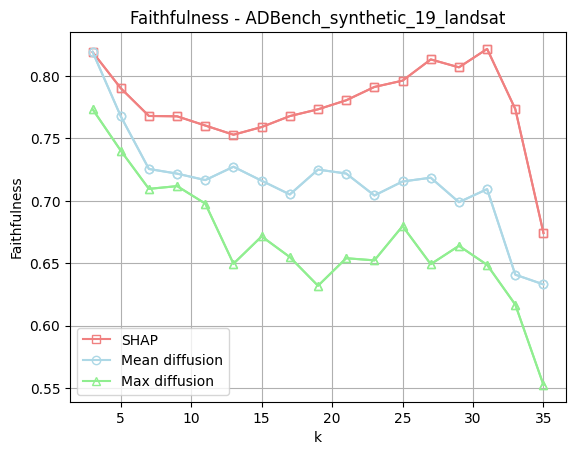

Dataset: ADBench_synthetic_19_landsat
     k      shap      mean       max   k
0    3  0.819198  0.819385  0.773463   3
1    5  0.790256  0.767796  0.740275   5
2    7  0.768026  0.725577  0.709642   7
3    9  0.767754  0.721841  0.711845   9
4   11  0.760365  0.716673  0.697818  11
5   13  0.753013  0.727359  0.649684  13
6   15  0.759156  0.716163  0.671568  15
7   17  0.767936  0.705168  0.655004  17
8   19  0.773348  0.725098  0.632045  19
9   21  0.780583  0.721918  0.654096  21
10  23  0.791270  0.704339  0.652376  23
11  25  0.796323  0.715548  0.679812  25
12  27  0.813315  0.718582  0.649315  27
13  29  0.806979  0.698987  0.664026  29
14  31  0.821726  0.709420  0.648765  31
15  33  0.773545  0.640922  0.616931  33
16  35  0.674245  0.633120  0.552619  35

--------------------------------------------------



In [24]:
for dataset in datasets:
    try:
        faithfulness_df = pd.read_csv(f'faithfulness_{dataset}.csv')
        if 'k' not in faithfulness_df.columns and 'index' in faithfulness_df.columns:
            k_col = np.array(list(range(3, 100, 2))[:len(faithfulness_df)], dtype=int)
            faithfulness_df['k'] = k_col
    except FileNotFoundError:
        print(f"File faithfulness_{dataset}.csv not found.")
        continue
    
    # Create a new figure for each dataset
    
    # Rename index column to 'k' if needed
    if 'index' in faithfulness_df.columns:
        faithfulness_df.rename(columns={'index': 'k'}, inplace=True)
    
    # Plot the data
    plt.plot(faithfulness_df['k'], faithfulness_df['shap'], label='SHAP', marker='s', linestyle='-', color='lightcoral', markerfacecolor='none')
    plt.plot(faithfulness_df['k'], faithfulness_df['mean'], label='Mean diffusion', marker='o', linestyle='-', color='lightblue', markerfacecolor='none')
    plt.plot(faithfulness_df['k'], faithfulness_df['max'], label='Max diffusion', marker='^', linestyle='-', color='lightgreen', markerfacecolor='none')
    
    # Add labels and grid
    plt.xlabel('k')
    plt.ylabel('Faithfulness')
    plt.title(f'Faithfulness - {dataset}')
    plt.grid(True)
    
    # Create legend with unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # Save and show the figure
    plt.savefig(f'faithfulness_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()  # Close the figure to ensure clean state for next iteration
    
    print(f"Dataset: {dataset}")
    print(faithfulness_df)
    print("\n" + "-"*50 + "\n")  # Separator between datasets